In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

# Prerequisites

- The Python library motuclient has to be installed: pip install motuclient
- Valid username and password for CMEMS need to be available

# Download data via command line directly

Download netCFD file (default.nc) using the motu client from command line
- create/check config file (motu-client.ini)
- set shell environment variables for CMEMS credentials (or define them in the config)
- download the file: 
   - Linux: motuclient --config motu-client.ini --user=\\${UN_CMEMS} --pwd=\\${PW_CMEMS}
   - Windows: motuclient --config motu-client.ini --user=%UN_CMEMS% --pwd=%PW_CMEMS%


Reference: https://github.com/clstoulouse/motu-client-python

# Download data via command line call from Python

In [2]:
# Set credentials from environment variables
UN_CMEMS = %env UN_CMEMS
PW_CMEMS = %env PW_CMEMS

In [3]:
motu_cmd = 'motuclient'
user = UN_CMEMS
pwd = PW_CMEMS
motu = 'https://nrt.cmems-du.eu/motu-web/Motu'
service_id = 'GLOBAL_ANALYSIS_FORECAST_WAV_001_027-TDS'
product_id = 'global-analysis-forecast-wav-001-027'
date_min = '2020-12-01'
date_max = '2020-12-01'
latitude_min = '27'
latitude_max = '61'
longitude_min = '-20'
longitude_max = '30'
depth_min = '0.493'
depth_max = '0.4942'
variable = 'VHM0'
out_dir = '.'
out_name = 'default.nc'

In [4]:
cmd = '{motu_cmd} \
       --user={user} \
       --pwd={pwd} \
       --motu={motu} \
       --service-id={service_id} \
       --product-id={product_id} \
       --date-min="{date_min}" \
       --date-max="{date_max}" \
       --latitude-min={latitude_min} \
       --latitude-max={latitude_max} \
       --longitude-min={longitude_min} \
       --longitude-max={longitude_max} \
       --depth-min={depth_min} \
       --depth-max={depth_max} \
       --variable={variable} \
       --out-dir="{out_dir}" \
       --out-name="{out_name}"'.format(motu_cmd=motu_cmd,
                                    user=user,
                                    pwd=pwd,
                                    motu=motu,
                                    service_id=service_id,
                                    product_id=product_id,
                                    date_min=date_min,
                                    date_max=date_max,
                                    latitude_min=latitude_min,
                                    latitude_max=latitude_max,
                                    longitude_min=longitude_min,
                                    longitude_max=longitude_max,
                                    depth_min=depth_min,
                                    depth_max=depth_max,
                                    variable=variable,
                                    out_dir=out_dir,
                                    out_name=out_name)

# Or use config file (motu-client.ini)
#cmd = 'motuclient --config motu-client.ini --user=${UN_CMEMS} --pwd=${PW_CMEMS}' # Linux
#cmd = 'motuclient --config motu-client.ini --user=%UN_CMEMS% --pwd=%PW_CMEMS%' # Windows

os.system(cmd)

0

# Read and plot data

In [5]:
file = 'default.nc'

In [6]:
ds = nc.Dataset(file)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    time_coverage_start: 20210205-03:00:00
    time_coverage_end: 20210206-00:00:00
    date_created: 20210127-08:28:00
    product_type: forecast
    product: GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    product_ref_date: 20210127-00:00:00
    product_range: D+9
    product_user_manual: http://marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-027.pdf
    quality_information_document:  http://marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-027.
    dataset: global-analysis-forecast-wav-001-027
    title: Mean fields from global wave model MFWAM of Meteo-France with ECMWF forcing
    institution: METEO-FRANCE
    references: http://marine.copernicus.eu
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    licence: http://marine.copernicus.eu/services-portfolio/service-commitments-and
    contact: servicedesk.cmems@mercator-ocean.eu
    producer: CME

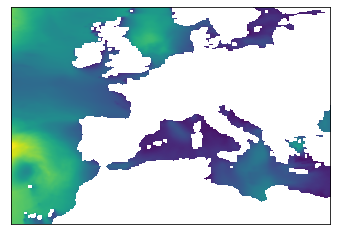

In [7]:
plt.imshow(np.flipud(ds['VHM0'][0, :, :]))
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)